# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### 1. Preprocessing

In [3]:
df["Gender"] = df["Gender"].map(lambda x: 1 if x=="Male" else 0)

In [4]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

### 2. Clustering

In [7]:
from sklearn.cluster import KMeans, DBSCAN

In [10]:
n_cluster = []
sse = []
for n in range(2,16):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    n_cluster.append(n)
    sse.append(kmeans.inertia_)

In [12]:
import matplotlib.pyplot as plt

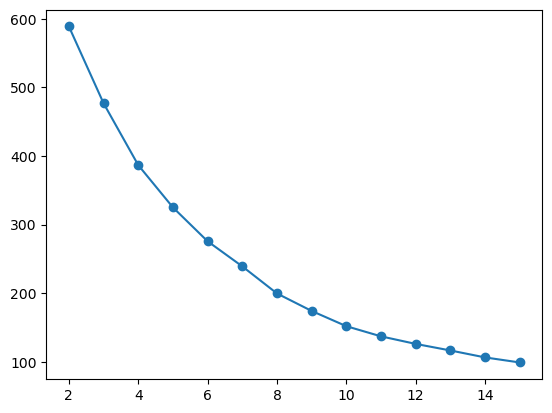

In [15]:
plt.plot(n_cluster, sse, "o-")
plt.show()

### 3. Evaluation

In [8]:
from sklearn.metrics import silhouette_score

In [19]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df)
df_ = kmeans.predict(df)
print(silhouette_score(df, df_))

0.42076374869477745


In [25]:
dbscan = DBSCAN()
df_ = dbscan.fit_predict(df)
print(silhouette_score(df, df_))

0.012015057781900538
